In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [34]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [14]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [30]:
logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success':'count'}) \
    .sort_values('success', ascending=False) \
    .query('success == 41') \
    .sort_values('client') \
    .client.tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [33]:
logs.query('success == True') \
    .groupby('platform') \
    .agg({'success':'count'})

,success
platform,
computer,1090
phone,2019
tablet,180


In [42]:
connected_data = user_data.merge(logs, how='inner', on='client')

In [46]:
connected_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [43]:
connected_data \
    .query('premium == True') \
    .value_counts('platform')

platform
phone       246
computer    150
tablet       24
dtype: int64

D:\EduPr\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\EduPr\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

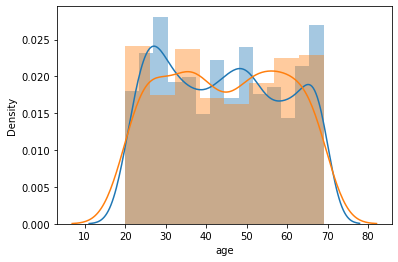

In [48]:
sns.distplot(connected_data.query('premium == False').age)
sns.distplot(connected_data.query('premium == True').age)

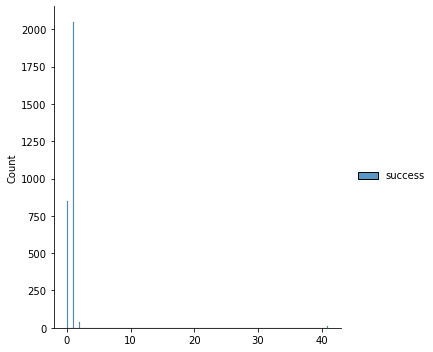

In [52]:
sns.displot(connected_data.groupby('client').agg({'success':'sum'}))

In [61]:
computer_data = connected_data.query('platform == "computer"').groupby('age', as_index=False).agg({'success':'sum'})

In [71]:
computer_data

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26
5,25,33
6,26,14
7,27,14
8,28,49
9,29,17


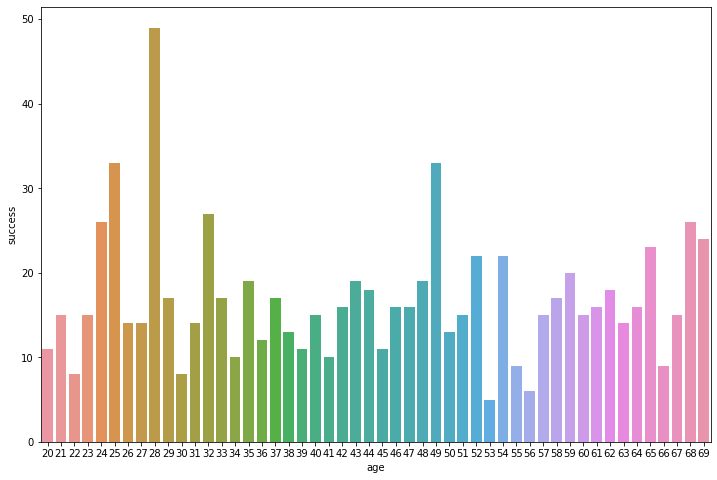

In [72]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x = computer_data.age, y = computer_data.success)

In [75]:
computer_success = connected_data.query('platform == "computer" and success == True"')

In [77]:
computer_success

,client,premium,age,success,platform,time


In [76]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(computer_success)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 864x576 with 0 Axes>